# Question 18

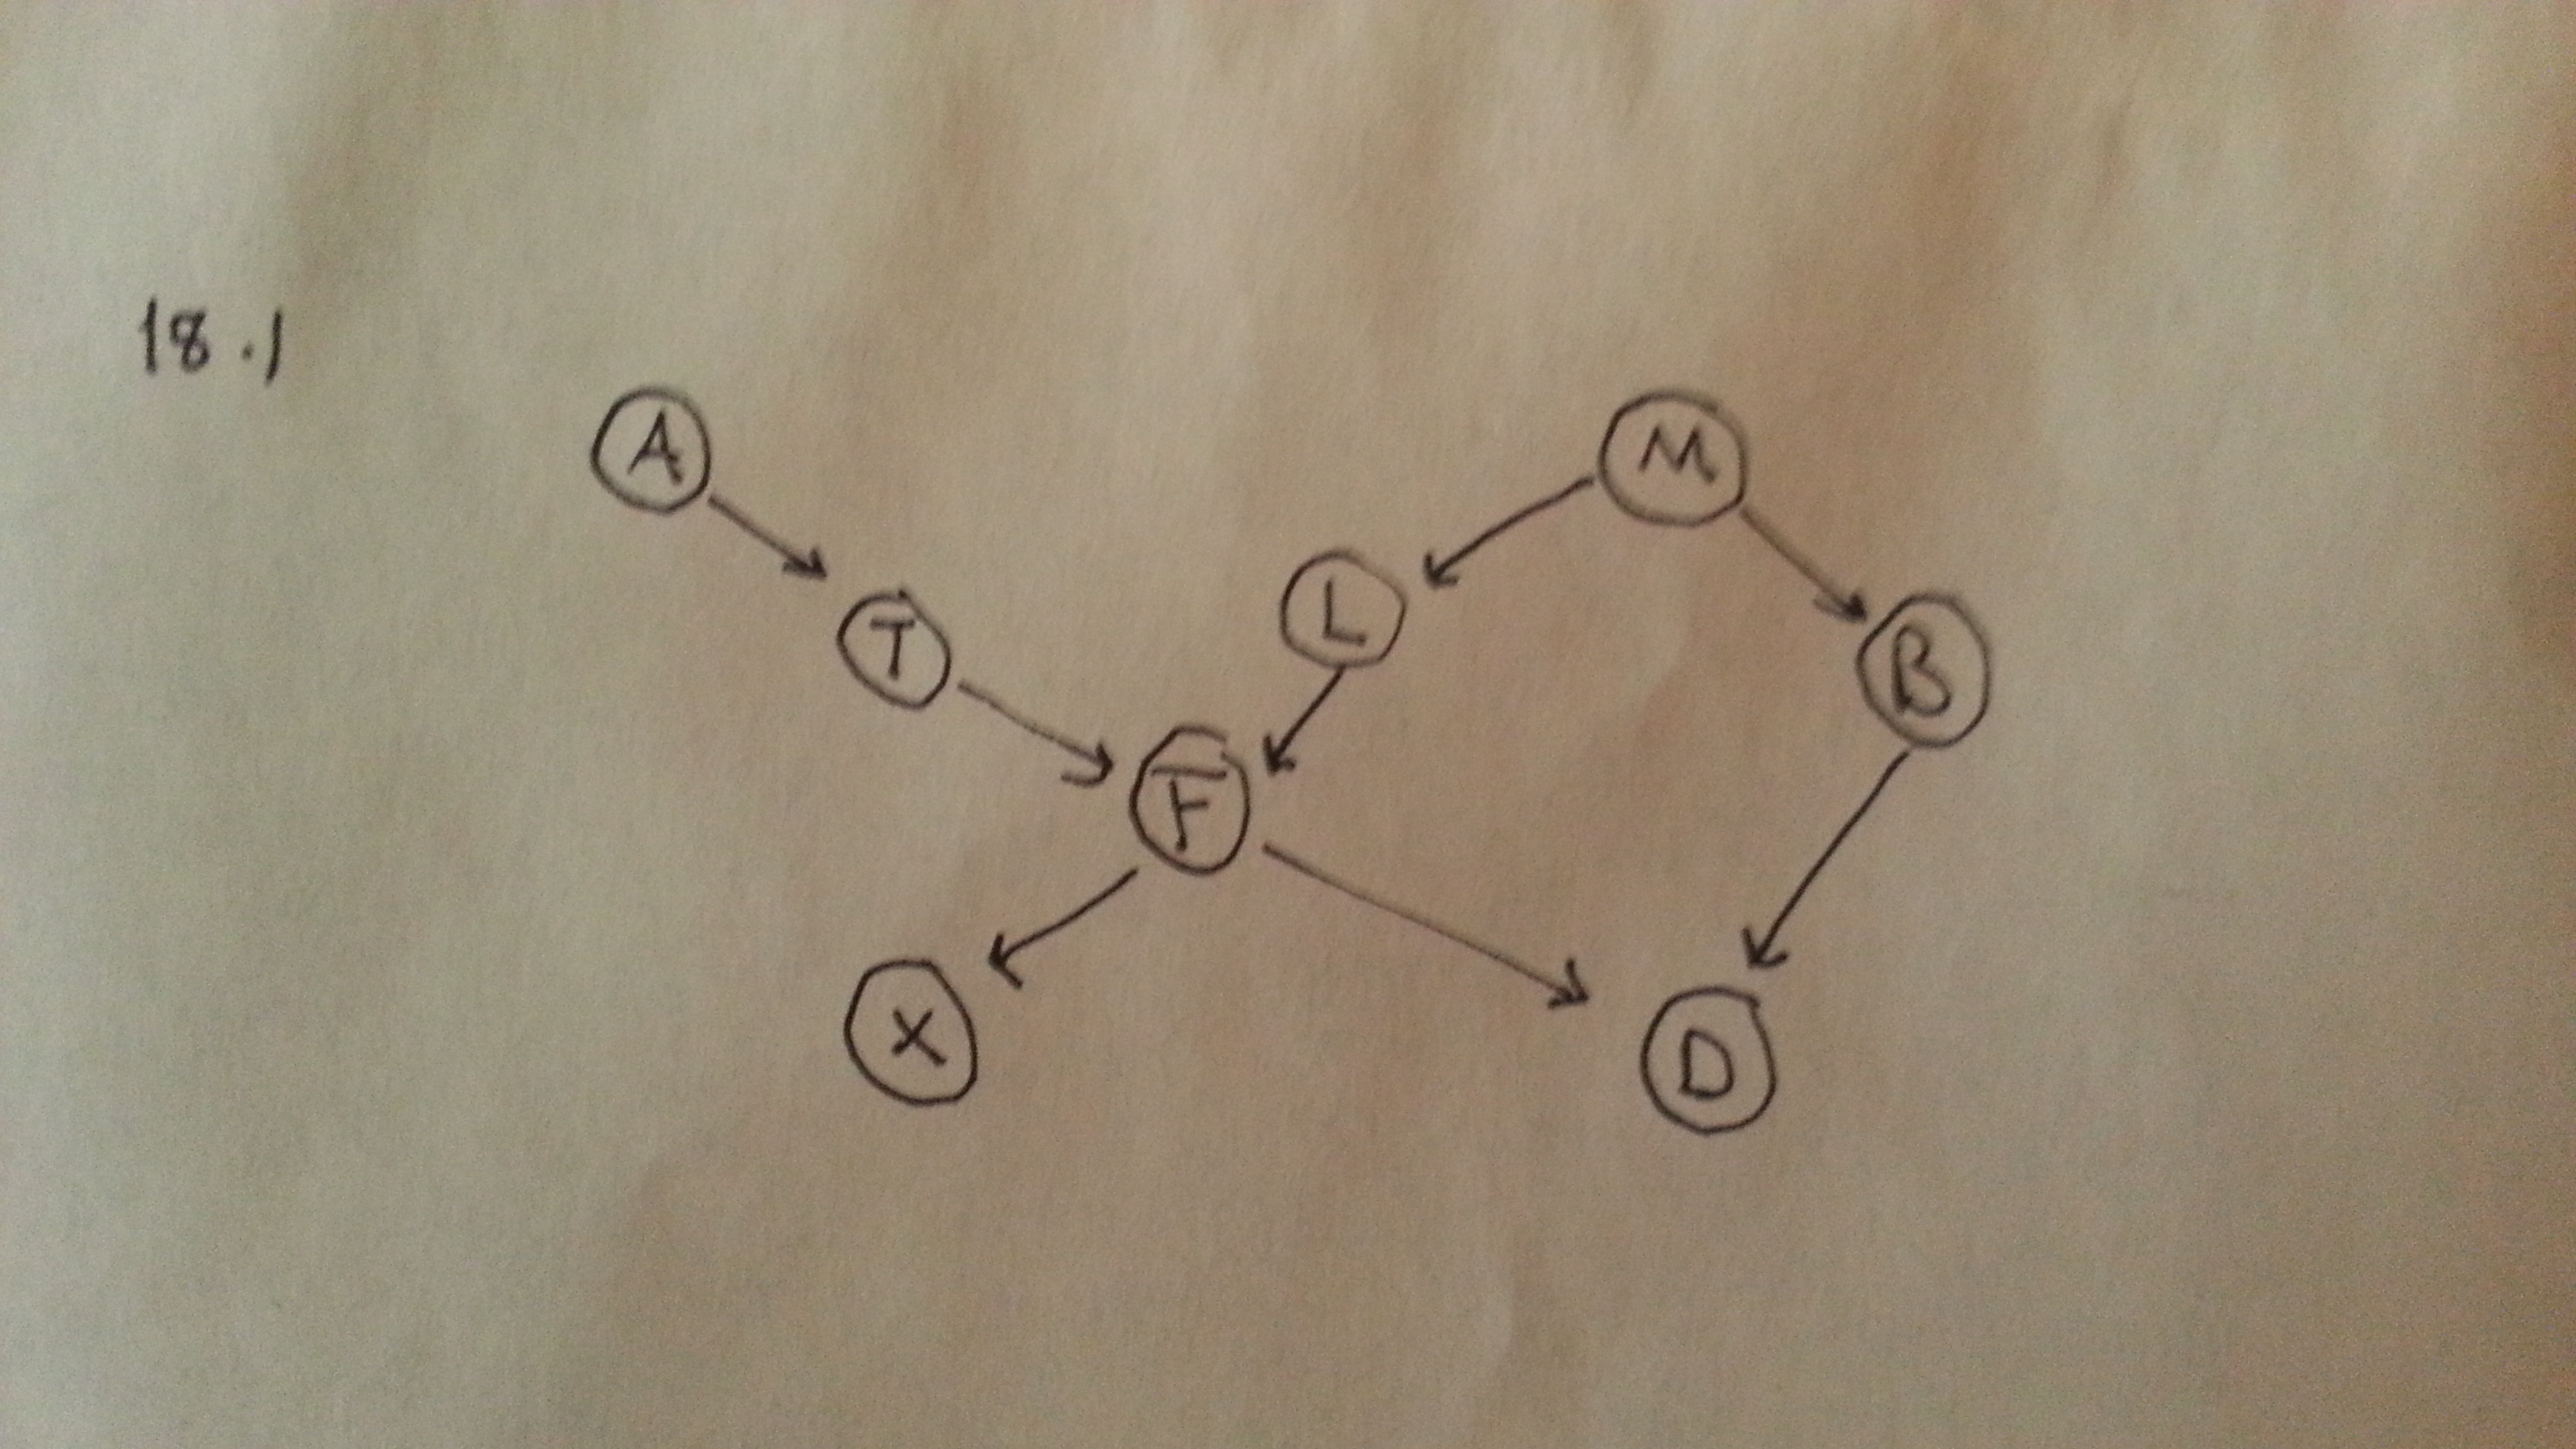

In [6]:
from IPython.display import Image
Image(filename='./18-1.jpeg')


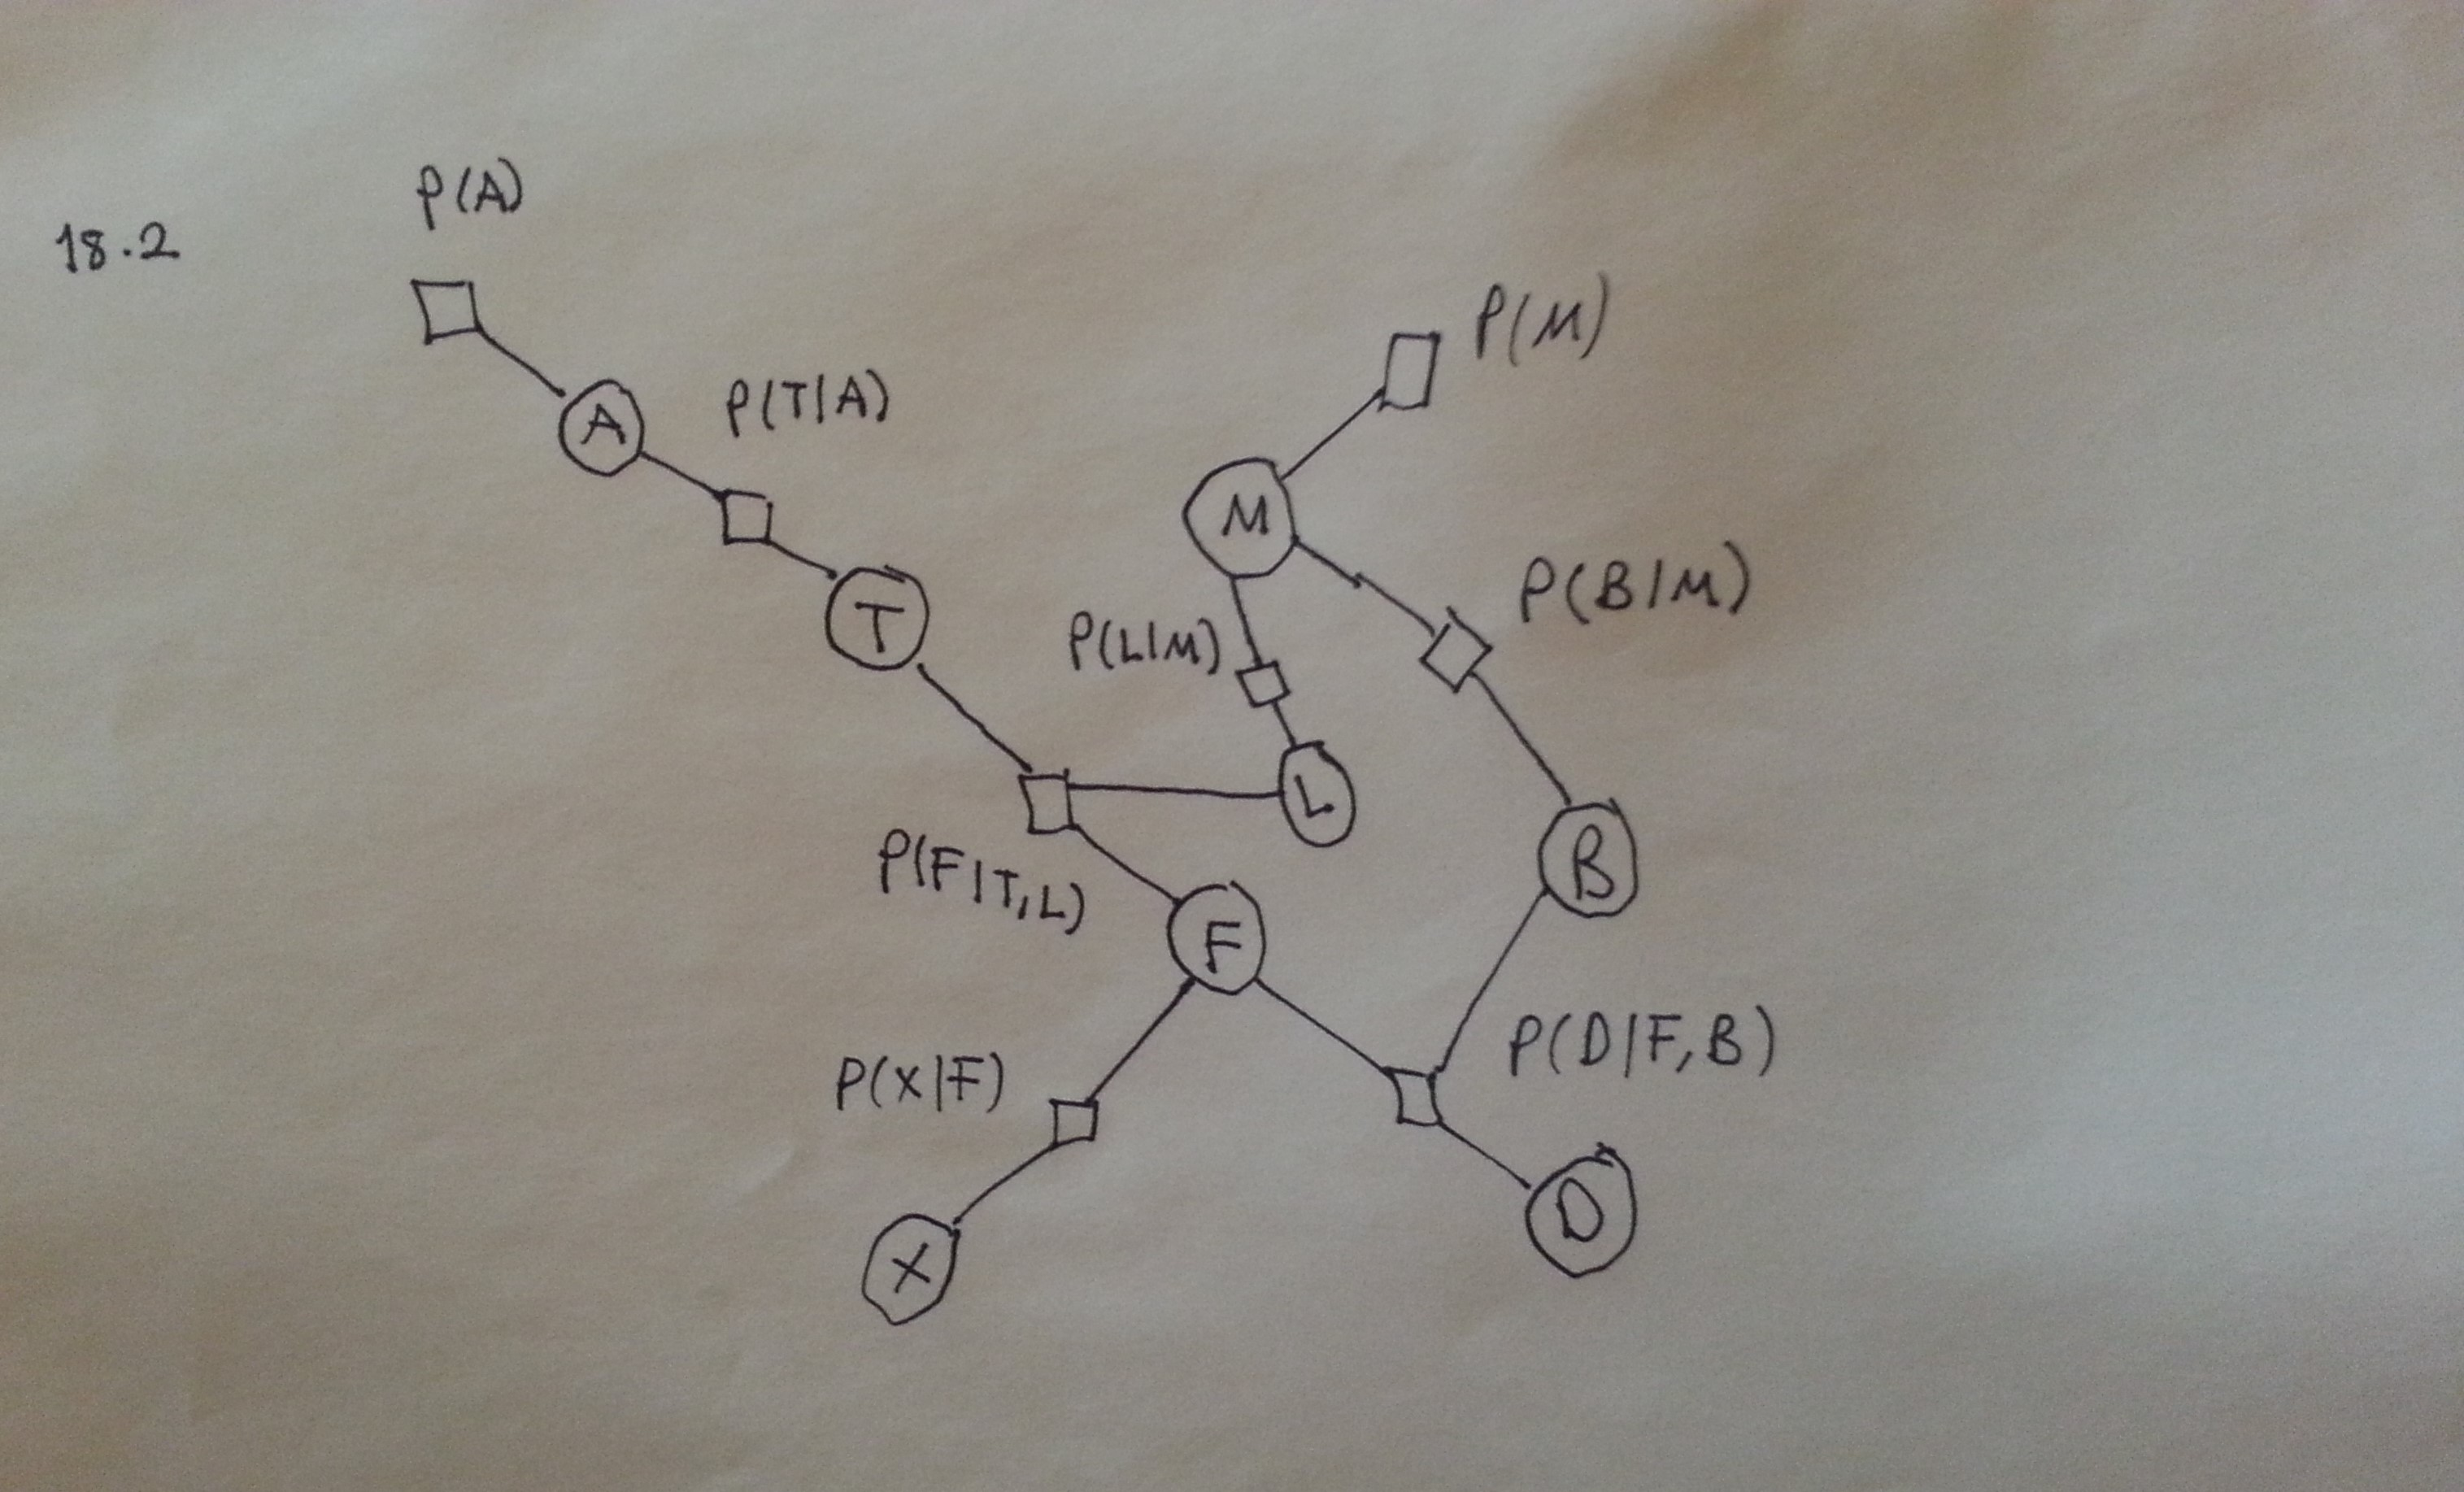

In [7]:
from IPython.display import Image
Image(filename='./18-2-1.jpeg')


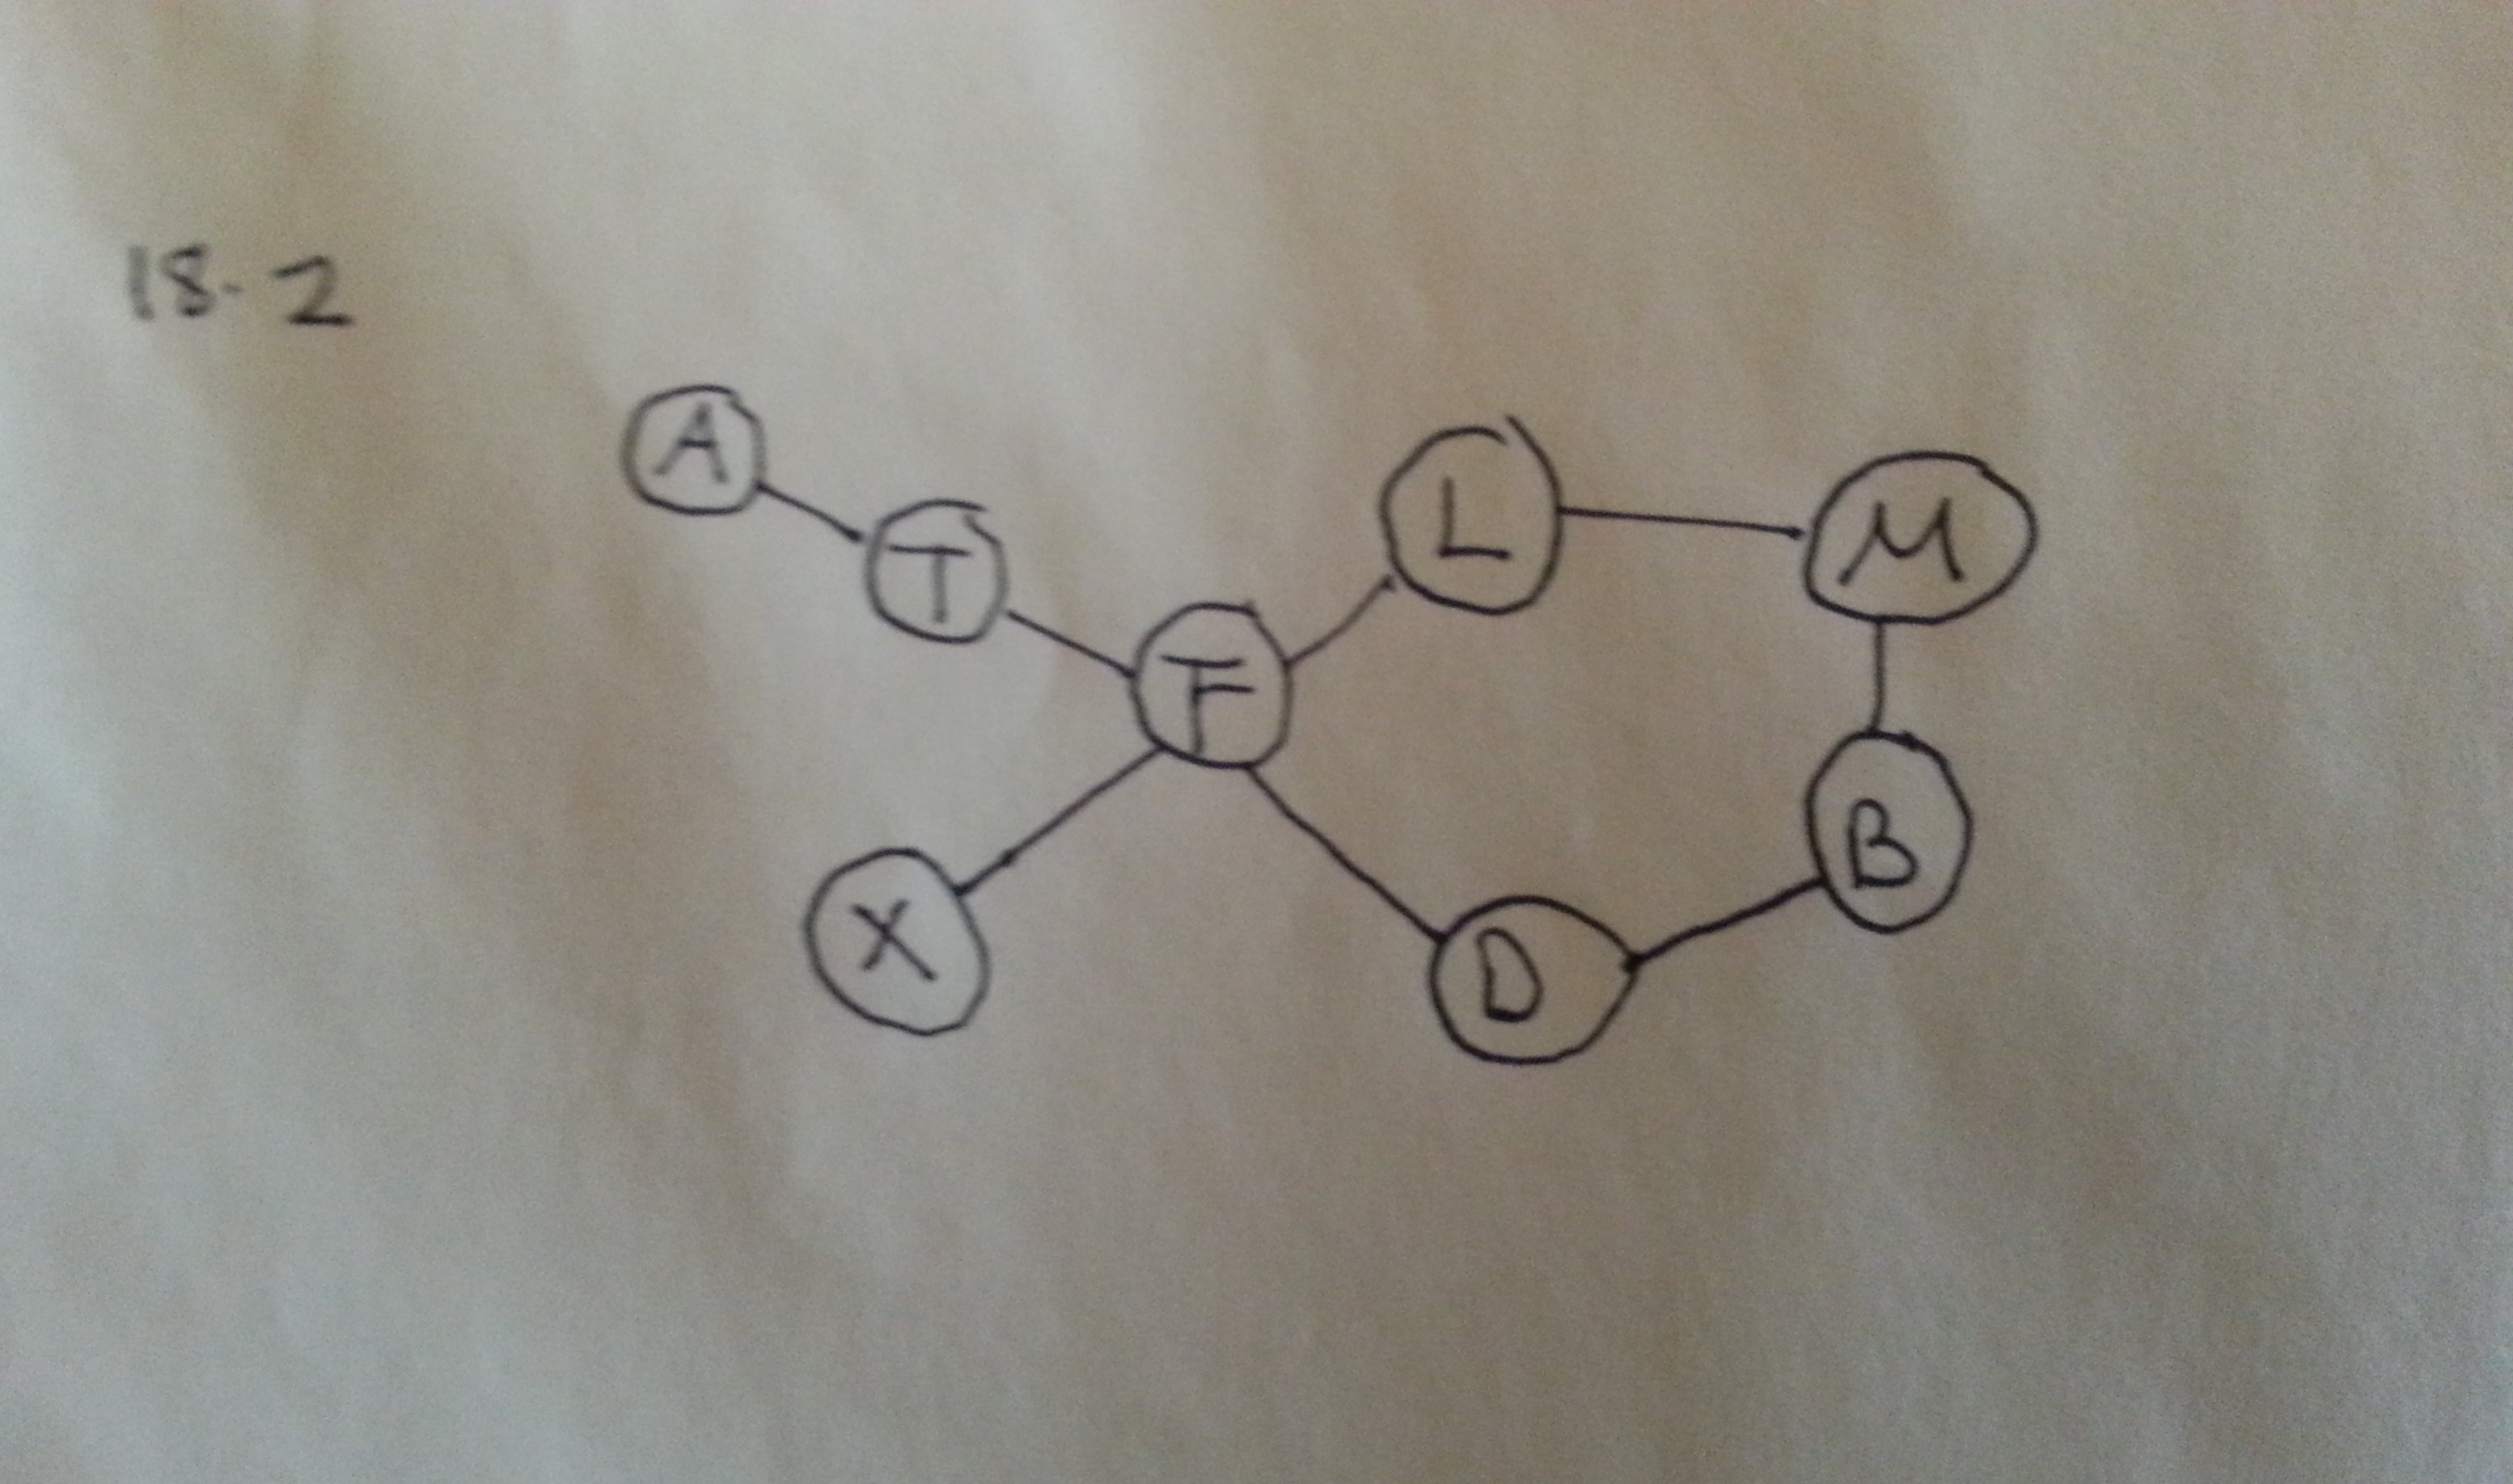

In [8]:
from IPython.display import Image
Image(filename='./18-2.jpeg')


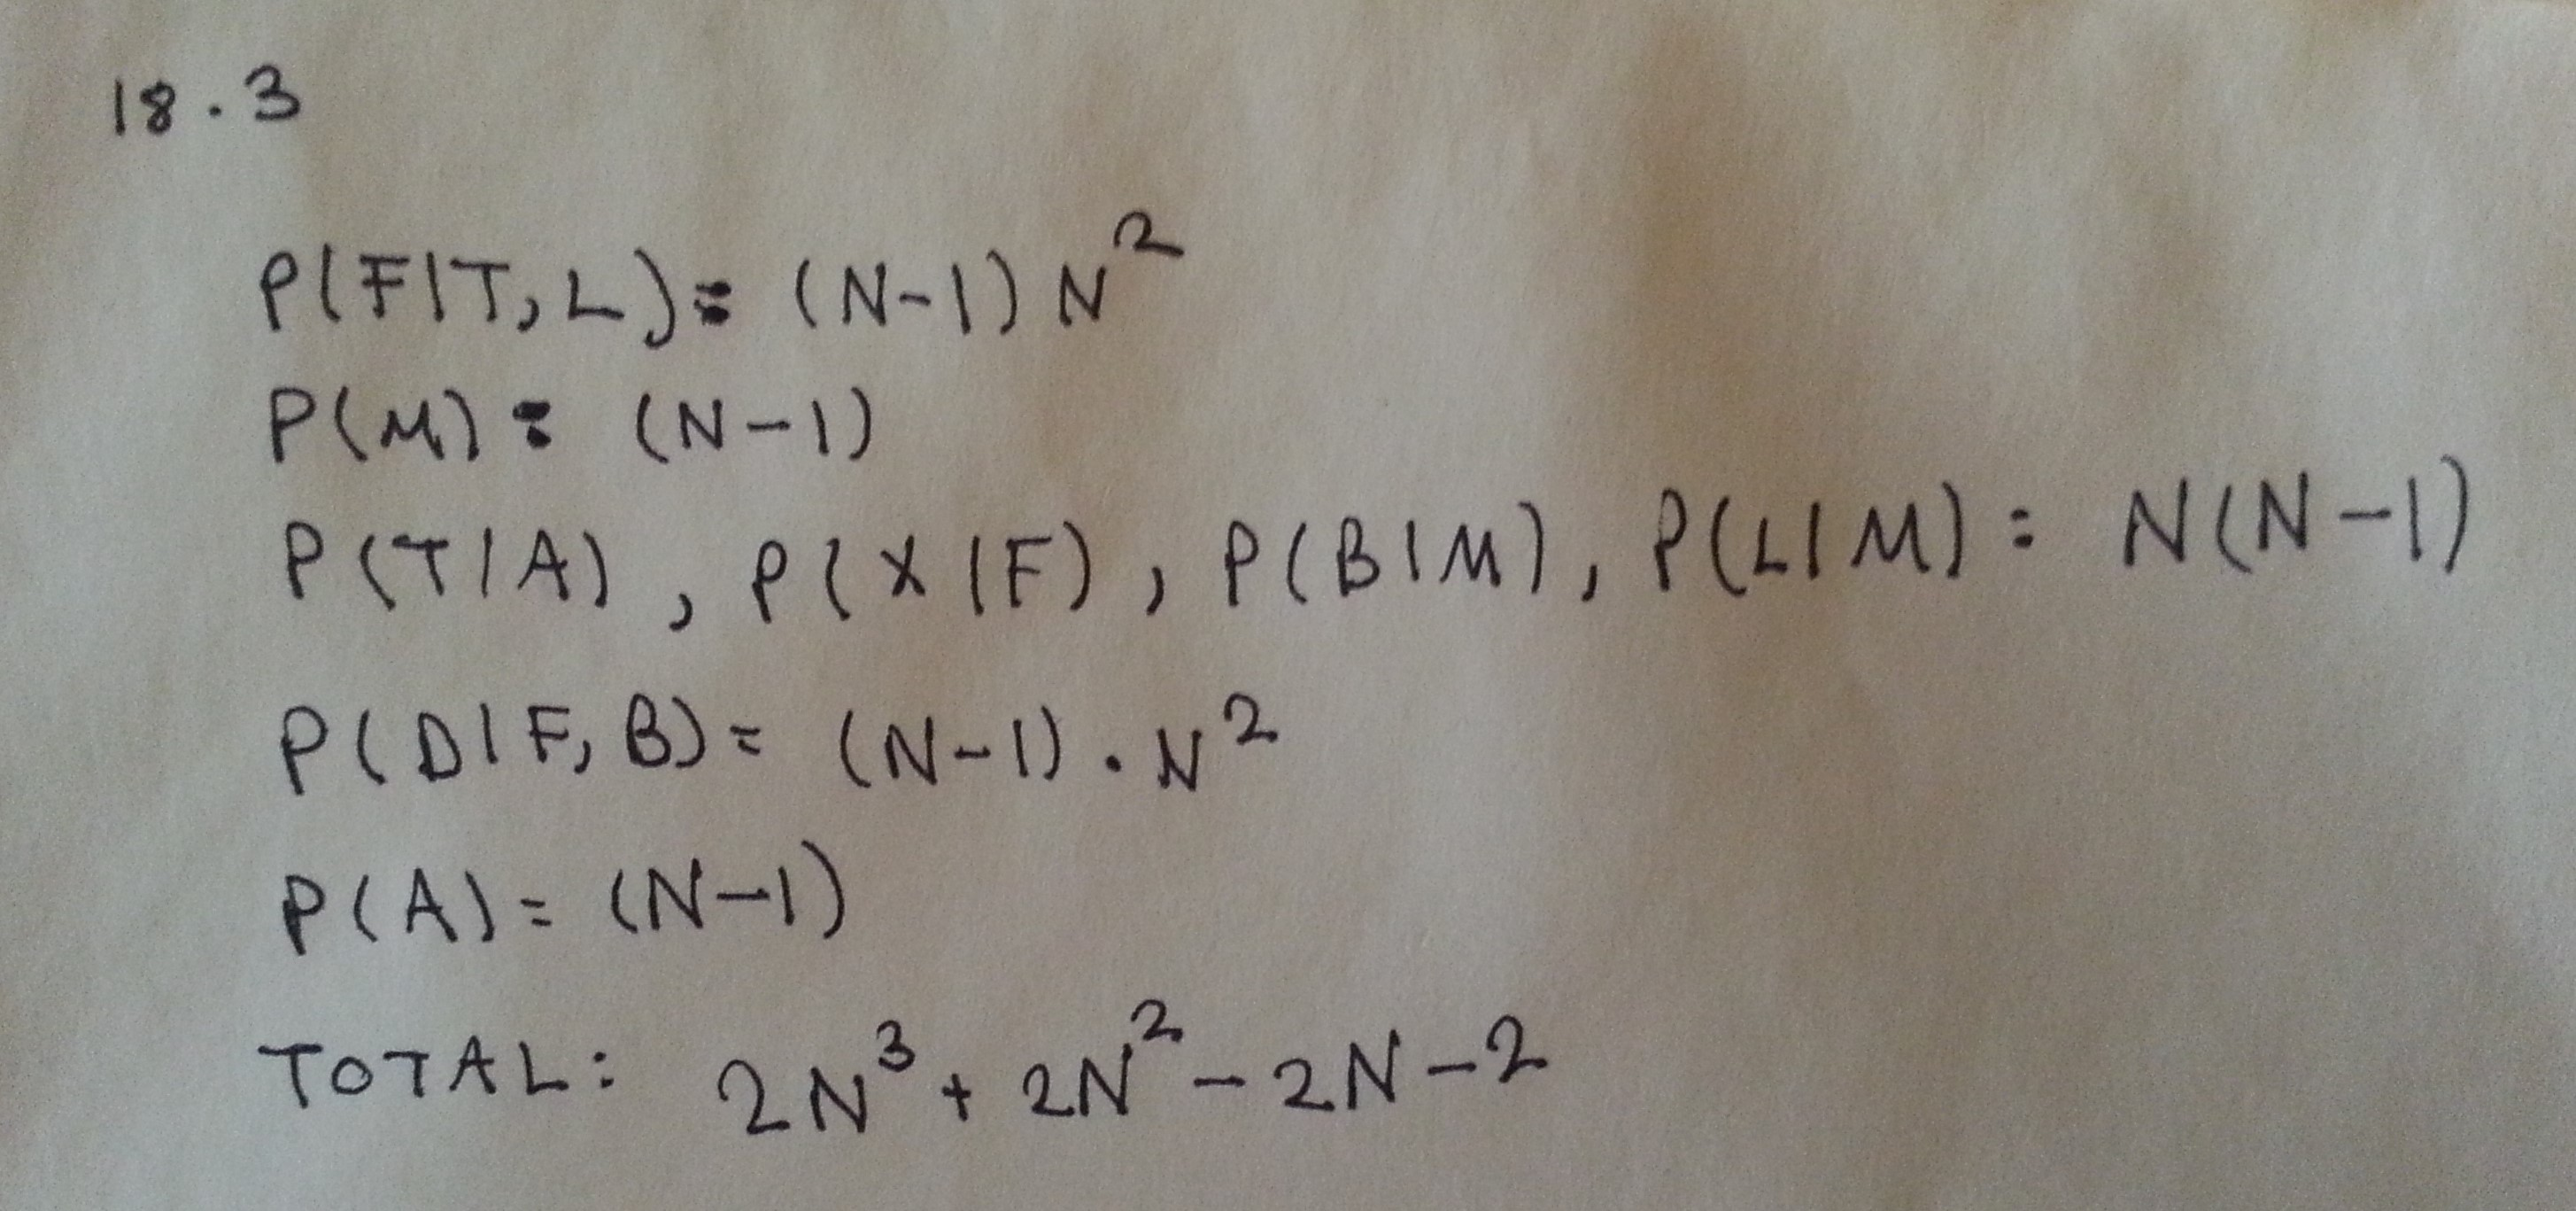

In [9]:
from IPython.display import Image
Image(filename='./18-3.jpeg')

### 18.4

a) True. 
- On every path between A and M, when there is head-tail collision, any of the nodes 
are not given. 
- On a path between A and M, There is a head-head collision on D. D is not given and any of
its descendants aren't given
- On a path between A and M, There is a head-head collision on F. F is not given and any of
its descendants aren't given
- On every path between A and M, There is no other head-head collision
 
From all above, A and M is d-separated => Statement is True.

b) False
- On a path between A and M , there is a head-head collision on F. 
- X is descendant of F and X is given
From all above, A and M is not d-separated => Statement is False.

c) False
- On a path between T and L , there is a head-head collision on F. 
- X is descendant of F and X is given
From all above, T and L is not d-separated => Statement is False.

d) True
- On a path between X and L , there is a head-tail collision on F. F is given so, this path is blocked
- On (X<-F->D<-B<-M->L) path between X and L , only head-head collision is on D and D is not given and 
any of its descendants aren't given, so this path is blocked too
- There is no other path between X and L
From all above, X and L are d-separated => Statement is True.

e) False
- On (X<-F<-L), There is a head-tail collision on F, F is not given so the path is not blocked
- On (X<-F->D<-B<-M->L) path between X and L , only head-head collision is on D and D is given, the
  path is not blocked
- On (X<-F->D<-B<-M->L) path between X and L , when there is a head-tail collision the collided node is not given
- There is no other path between X and L
From all above, X and L are not d-separated => Statement is False.



In [148]:
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

In [149]:
import csv
from IPython.display import display, Latex

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}

T = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T.append(row)

print('Example')
## p(x_t = 'u' | x_{t-1} = 'q')
display(Latex(r"$p(x_t = \text{'u'} | x_{t-1} = \text{'q'})$"))
print(T[letter2idx['q']][letter2idx['u']])
display(Latex(r"$p(x_t | x_{t-1} = \text{'a'})$"))
for c,p in zip(alphabet,T[letter2idx['a']]):
    print(c,p)

Example


<IPython.core.display.Latex object>

0.9949749


<IPython.core.display.Latex object>

a 0.0002835
b 0.0228302
c 0.0369041
d 0.0426290
e 0.0012216
f 0.0075739
g 0.0171385
h 0.0014659
i 0.0372661
j 0.0002353
k 0.0110124
l 0.0778259
m 0.0260757
n 0.2145354
o 0.0005459
p 0.0195213
q 0.0001749
r 0.1104770
s 0.0934290
t 0.1317960
u 0.0098029
v 0.0306574
w 0.0088799
x 0.0009562
y 0.0233701
z 0.0018701
. 0.0715219


# Part 1

In [150]:
import itertools as it
import numpy as np

def sample_string(N,T,numeric_alphabet):
    
    string_arr = np.zeros(N,dtype=np.str)
    cur = letter2idx['.']

    for i in range(N):
        cur = np.random.choice(numeric_alphabet,p=T[cur])
        string_arr[i] = alphabet[cur]
    
    print(''.join(string_arr))
    

#Normalizing each row
T_norm = np.array(T)         
T_norm = T_norm.astype(np.float)
for i in range(len(alphabet)):
    T_norm[i] = T_norm[i] / T_norm[i].sum()
    
numeric_alphabet = [x for x in range(len(alphabet))]

sample_string(300,T_norm,numeric_alphabet)

thoflghiloun.oruckealivata.ad.ershim.lathae.d.mayenis.p.s.avive.min.en.t.wallmsas.mesoritore.of.or.e.n.bstr.te.his.walldsomanome.curs.satre.mbundre.orth.h.ed.theaint.m..ch.thenousstw.whes.pe.buat.hesi.ngea.se.tevedirint.wnflaseired.woly.f.bn.t.wis.thast.t..inngeatr.f.qum.s..wether.abubit.e.arin.a.wo


# Part2

Each disjoint unknown substring will be called block. Since we use Markov(1) Model, each block is independent. 
Within a block we have $X_{1:N}$. $X_{0}$ is the letter just left to the first element of block and $X_{N+1}$ is the letter right after to the last element of block. $\hat{x}_{0}$
In general for each block we seek to sample 

$p(x_{-\\a}|x_{\\a})$ = $p(x_{1}|x_{0} = \hat{x}_{0}) p(x_{2}|x_{1}) p(x_{3}|x_{2}) ... p(x_{N}|x_{N-1}) p({x}_{N+1} = \hat{x}_{N+1}|x_{N}) $ 


### Method for Part 2 & 3

In [151]:
import itertools as it
import numpy as np

def predict(string,is_sample=True):
    
    chars = list(string)
    string += '.'
    cur_unknown = False
    prev_unknown = False

    blocks = []
    for i in range(len(string)):
        if string[i] == '_' or string[i] == '?':
            cur_unknown = True
        else:
            cur_unknown = False
        if prev_unknown == True and cur_unknown == True:
            blocks[len(blocks)-1].append(i)
        if prev_unknown == False and cur_unknown == True:
            blocks.append([i])
        prev_unknown = cur_unknown

    #print(blocks)

    blocks_extended = []

    for block in blocks:
        temp = [len(block)]
        prev_index = block[0]-1 #index in string
        next_index = block[len(block)-1]+1 #index in string
        prev_index = letter2idx[string[prev_index]] #corresponding index in alphabet
        next_index = letter2idx[string[next_index]] #corresponding index in alphabet
        temp.extend([prev_index])
        temp.extend([next_index])
        blocks_extended.append(temp)

    #print(blocks_extended) #Represents [len(block),prev_index, next_index] for each block

    numeric_alphabet = [x for x in range(len(alphabet))]
    
    probability_all = 1
    for block_index in range(len(blocks)):
        block = blocks_extended[block_index]
        cartesian=list(it.product(numeric_alphabet,repeat=block[0]))
        probabilities = np.zeros(len(cartesian),dtype=float)

        for tup_index in range(len(cartesian)):
            tup = cartesian[tup_index];
            product = float(T[block[1]][tup[0]]) # P(first_letter_of_block | prev_letter)
            for index in range(0,len(tup)-1):
                product*=float(T[tup[index]][tup[index+1]]) # Multiply probabilities of each transition in candidate block

            product *= float(T[tup[len(tup)-1]][block[2]])  # P(next_letter | last_letter_of_block)
            probabilities[tup_index] = product
        
        
        probabilities /= probabilities.sum()
        if is_sample: #for question part-2
            selection=np.random.choice(np.arange(0,len(alphabet)**block[0]),p=probabilities)
        else: #for question part-3
            selection = np.argmax(probabilities)
        
        probability_all *= probabilities[selection]
        
        block = blocks[block_index]
        block_selection = cartesian[selection]

        for j in range(len(block)):
            chars[block[j]] = alphabet[block_selection[j]]
    
    filled_string = ''.join(chars)
   
    print(filled_string)
    if not is_sample:
        print(np.log(probability_all))

### Part 2 - Outputs

In [152]:
for string in test_strings:
    for i in range(4):
        predict(string)
    print()

tht.brdin.fex.
thoubrman.fex.
tho.br.an.fex.
the.br.in.fex.

quasthind.to.be.answarnd
ounstorne.toybe.rnsware.
tutsthano.to.be.onswarea
bunststnd.toube.answir.s

igrate.sathand.fe.rding
ie.ate.tathent.beuruing
illate.hathiny.teur.ing
itwatl.bathen..tear.ing

qutat.morz.thas.t..d.red.ms.
qum.t.lsiz.urd.at.id.pes.th.
qui.t.lozz.t.he.t.en.pan.de.
qur.t.rerz.wrin.t.ts.ing..t.



### Part 3 - Outputs

In [19]:
for string in test_strings:
    predict(string,is_sample=False)
    print()

the.br.an.fex.
-3.07433486577

oursthend.to.be.answered
-11.0693279723

in.ath.wathend.he.r.ing
-11.636089996

qus.t.herz.thed.t.he.the.he.
-21.1402671647



### Part 4